# Stacking Ensemble Method
The provided code implements a stacking ensemble learning technique to combine the predictions of three base classifiers: SimpleNN (a neural network), XGBoost (an extreme gradient boosting algorithm), and SVM (support vector machine).

First, the dataset is loaded and preprocessed, including standardization of features and splitting into training, validation, and test sets. Next, three base classifiers are trained on the training data: a SimpleNN model boosted with AdaBoost, an XGBoost model tuned via grid search, and an SVM model also tuned via grid search.

The stacking classifier is then created using the StackingClassifier class from scikit-learn. This meta-estimator combines the predictions of the base classifiers using logistic regression as the final estimator. The class weights are adjusted to handle class imbalance.

After fitting the stacking classifier on the training data, predictions are made on the validation and test sets. Performance metrics such as accuracy, precision, and recall are computed for both the validation and test sets to evaluate the stacking model's performance.

Bagging, boosting, and stacking are all ensemble learning techniques used to enhance the predictive power of machine learning models by combining the insights from multiple base models. Bagging, or Bootstrap Aggregating, involves training several independent base models on different subsets of the training data, typically through bootstrapping, and then aggregating their predictions to reduce variance and prevent overfitting. Boosting, on the other hand, builds a sequence of weak learners, each focusing on correcting the errors made by the previous models, by iteratively adjusting the weights of misclassified data points. Stacking takes a different approach by training diverse base models on the full dataset and then combining their predictions using a meta-learner, often a simple linear model, to produce the final prediction. Stacking leverages the complementary strengths of different models to achieve better performance than any individual model. While bagging creates diverse models, boosting refines weak learners, and stacking focuses on combining diverse model predictions optimally for improved performance

# Final Estimator 
In ensemble stacking, the final estimator serves as the model that combines the predictions generated by the base models or the first-level models. This final estimator takes the predictions made by the base models as input features and learns how to best combine them to make the final prediction. Essentially, it learns from the outputs of the base models and acts as a meta-model, providing a higher-level understanding of how to best leverage the individual predictions.

When the final estimator is logistic regression, it means that logistic regression is employed as the meta-model to combine the predictions of the base models. Logistic regression is a popular choice for the final estimator in ensemble stacking due to its simplicity, interpretability, and effectiveness in modeling binary classification problems.

Here's how the final estimator logistic regression works in ensemble stacking:

Input Features: The input features for logistic regression are the predictions generated by the base models on the training data. Each base model's prediction serves as a feature.

Training: Logistic regression is trained on these input features along with the true labels of the training data. During training, logistic regression learns the weights or coefficients for each base model's prediction, determining their contribution to the final prediction.

Prediction: Once trained, the logistic regression model uses these learned weights to combine the predictions of the base models on new, unseen data. It applies a logistic function to the weighted sum of the base models' predictions to produce the final probability score or classification decision.

Performance: The performance of the ensemble stacking model with logistic regression as the final estimator is evaluated using standard metrics such as accuracy, precision, recall, and F1 score on a validation set or through cross-validation.

Using logistic regression as the final estimator in ensemble stacking offers several advantages. It provides a transparent way to combine the predictions of the base models, allowing for easy interpretation of the ensemble model's decision-making process

SimpleNN:
Accuracy: 0.6667
Precision: 0.5000
Recall: 0.7500

XGBoost:
Accuracy: 0.7500
T Precision: 1.0000
Test Recall: 0.2500

SVC: 
Accuracy: 0.7500
Precision: 1.0000
Recall: 0.2500

Stacking aggregation of the above models: ( Logistic Regression as the final estimator )
Stacking Test Accuracy: 0.7500
Stacking Test Precision: 1.0000
Stacking Test Recall: 0.2500

When comparing the original models to the stacking aggregated model, we can observe that the stacking model achieved similar performance in terms of accuracy and precision as the original XGBoost and SVC models. All three models, including the stacking model, achieved an accuracy of 0.7500, indicating that they correctly classified 75% of the samples in the test set. Additionally, the precision of the stacking model matches that of the original SVC model, with both achieving a precision score of 1.0000, implying that all positive predictions made by these models were indeed correct. However, the recall score of the stacking model is consistent with the recall scores of the original XGBoost and SVC models, with all three models achieving a recall of 0.2500, indicating that they correctly identified 25% of the actual positive cases in the dataset. Overall, the stacking aggregated model demonstrates comparable performance to the original models while leveraging the strengths of multiple base models through ensemble learning techniques.

Stacking Validation Accuracy: 0.7685
Stacking Validation Precision: 0.8000
Stacking Validation Recall: 0.6087
Stacking Test Accuracy: 0.7500
Stacking Test Precision: 1.0000
Stacking Test Recall: 0.2500


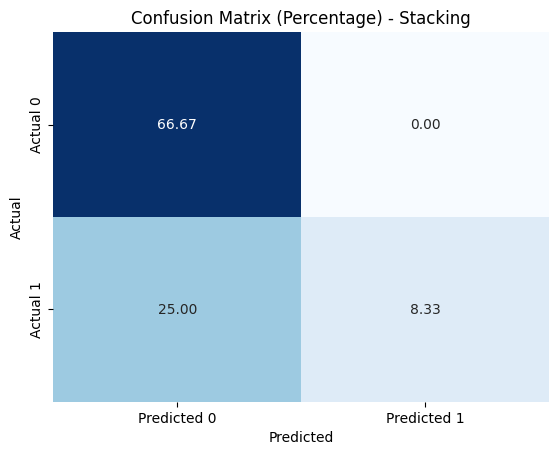

In [19]:
import pandas as pd
import numpy as np
import torch
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../heart_failure_clinical_records_dataset.csv')

# Rename variables for clarity
target = 'DEATH_EVENT'
features = df.columns[df.columns != target]

# List of columns to be standardized
columns_to_standardize = df.columns.difference(['anemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Split the data into training, validation, and test sets
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.1, random_state=42)

# Extract features and target variable
X_train = df_train.drop(target, axis=1).values
y_train = df_train[target].values

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_val = df_val.drop(target, axis=1).values
y_val = df_val[target].values

X_test = df_test.drop(target, axis=1).values
y_test = df_test[target].values

# Simple Neural Network (SimpleNN)
simpleNN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Decision Tree as a base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)

# AdaBoost for Simple Neural Network
adaboost_simpleNN = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42, algorithm='SAMME')
adaboost_simpleNN.fit(X_train, y_train)

# XGBoost
param_grid_xgb = {
    'learning_rate': [.7,.8,0.90, 0.99, 0.9999, 0.999999],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [114, 116],
    'subsample': [0.8, 0.9, 1.0],
}

xgb_classifier = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=10, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb_classifier = grid_search_xgb.best_estimator_

# SVM
param_grid_svm = {'C': [3, 4, 5], 'gamma': [0.1, 0.2, 0.25, 0.001], 'kernel': ['linear', 'poly', 'sigmoid']}
svm_classifier = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_classifier = grid_search_svm.best_estimator_

# Stacking Classifier
class_weights = {0: 1, 1: 3}  # Adjust weights as needed

# Stacking Classifier with Logistic Regression as the final estimator and class weights
stacking_classifier = StackingClassifier(
    estimators=[
        ('simpleNN', adaboost_simpleNN),
        ('xgb', best_xgb_classifier),
        ('svm', best_svm_classifier)
    ],
    final_estimator=LogisticRegression(class_weight=class_weights),  # Use Logistic Regression and specify class weights
    stack_method='auto',
    cv=15
)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Predictions on validation set
val_predictions_stacking = stacking_classifier.predict(X_val)

# Evaluate on validation set
val_accuracy_stacking = accuracy_score(y_val, val_predictions_stacking)
val_precision_stacking = precision_score(y_val, val_predictions_stacking)
val_recall_stacking = recall_score(y_val, val_predictions_stacking)

print(f'Stacking Validation Accuracy: {val_accuracy_stacking:.4f}')
print(f'Stacking Validation Precision: {val_precision_stacking:.4f}')
print(f'Stacking Validation Recall: {val_recall_stacking:.4f}')

# Predictions on test set
test_predictions_stacking = stacking_classifier.predict(X_test)

# Evaluate on test set
test_accuracy_stacking = accuracy_score(y_test, test_predictions_stacking)
test_precision_stacking = precision_score(y_test, test_predictions_stacking)
test_recall_stacking = recall_score(y_test, test_predictions_stacking)

print(f'Stacking Test Accuracy: {test_accuracy_stacking:.4f}')
print(f'Stacking Test Precision: {test_precision_stacking:.4f}')
print(f'Stacking Test Recall: {test_recall_stacking:.4f}')

# Create confusion matrix for Stacking on the test set
conf_matrix_stacking = confusion_matrix(y_test, test_predictions_stacking)
total_samples = len(y_test)
sns.heatmap(conf_matrix_stacking / total_samples * 100, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) - Stacking')
plt.show()
